In [17]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [18]:
def generate_data(n, m, p):
    # Randomly generate secret vector u
    u = np.random.randint(2, size=n)
    
    # Generate random vectors a_i
    A = np.random.randint(2, size=(m, n))
    
    # Generate noisy bits b_i
    B = []
    num_noisy = int(p * m)
    
    # Ensure at least (1 - p)m indices are correct
    correct_indices = random.sample(range(m), m - num_noisy)
    
    for i in range(m):
        if i in correct_indices:
            b = np.dot(A[i], u) % 2
        else:
            b = (np.dot(A[i], u) + 1) % 2  # Flip the bit to introduce noise
        B.append(b)
    
    return A, np.array(B), u


In [19]:
def plot_distribution(B):
    plt.hist(B, bins=2, edgecolor='black')
    plt.title('Distribution of b_i\'s')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()


In [27]:
# Parameters
n = 5  # Number of bits in vector a_i and secret vector u
m = 20  # Number of samples
p = 0.2  # Probability of noise

# Generate data
A, B, u = generate_data(n, m, p)


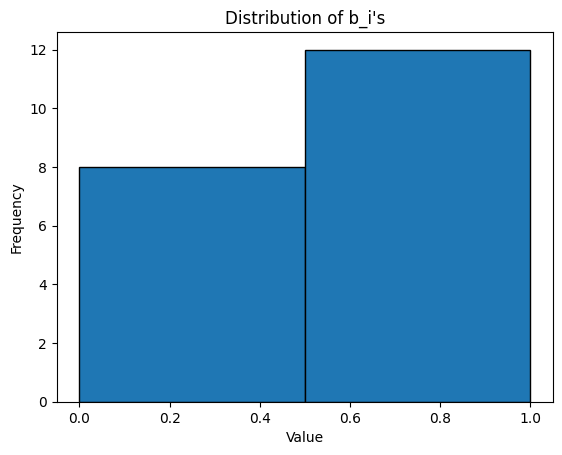

In [28]:
# Plot distribution of b_i's
plot_distribution(B)

In [29]:
def exponential_search(A, B, n):
    best_u = None
    max_correct = -1
    
    for u_candidate in itertools.product([0, 1], repeat=n):
        u_candidate = np.array(u_candidate)
        correct_count = np.sum((np.dot(A, u_candidate) % 2) == B)
        
        if correct_count > max_correct:
            max_correct = correct_count
            best_u = u_candidate
    
    return best_u


In [30]:
# Exponential search to find u
u_found = exponential_search(A, B, n)

print("Secret vector u:", u)
print("Found vector u:", u_found)
print("Are they equal?", np.array_equal(u, u_found))

Secret vector u: [0 0 0 0 1]
Found vector u: [0 0 0 0 1]
Are they equal? True


: 